In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TO DO: FILL NA W STAN WYKOŃCZENI? rynek

In [52]:
dt1 = pd.read_csv('./oferty_otodom 1-21.csv')
dt2 = pd.read_csv('./oferty_otodom 22-39.csv')
dt1.shape

(38, 18)

In [53]:
dt2.shape

(38, 18)

In [54]:
data = pd.concat([dt1, dt2]).drop_duplicates()
data.shape

(37, 18)

In [55]:
data.drop_duplicates().shape

(37, 18)

In [56]:
dt1.drop_duplicates().shape

(34, 18)

In [57]:
dt2.drop_duplicates().shape

(34, 18)

In [58]:
data['lokalizacja'] = data['lokalizacja'].fillna(data['zametr'].where(data['zametr'].str.contains('Wrocław')))
data.loc[data['zametr'].str.contains('Wrocław'), 'zametr'] = np.nan
data_raw = data.copy()

colnames = ['czynsz', 'cena', 'zametr', 'powierzchnia']
replace_dict = {'zł': '', 'm2': '', '/': '', ' ': ''}

data_raw[colnames] = data_raw[colnames].astype('str')
data_raw[colnames] = data_raw[colnames].applymap(lambda x: str(x).replace('zł', '').replace('m²', '').replace('/', '').replace(' ', '').replace(',', '.'))
data_raw[colnames] = data_raw[colnames].astype('float')
data_raw['zametr'] = round(data_raw['zametr'].fillna(data_raw['cena'] / data_raw['powierzchnia']), 2)
data_raw['piętro'] = data_raw['piętro'].str.replace('parter', '0')
data_raw['liczba pięter'] = data_raw['piętro'].str.extract(r'(\d+)/(\d+)')[1].astype(float)
data_raw['piętro'] = data_raw['piętro'].str.extract(r'(\d+)').astype(float)
data_raw['pokoje'] = data_raw['pokoje'].fillna(1)

dzielnice = '|'.join(['Fabryczna', 'Krzyki', 'Stare Miasto', 'Śródmieście', 'Psie Pole'])
data_raw['dzielnica'] = data_raw['lokalizacja'].str.extract(f'({dzielnice})')
data_raw.insert(4, 'dzielnica', data_raw.pop('dzielnica'))

column_moved = data_raw.columns[-1]
data_raw.insert(12, column_moved, data_raw.pop(column_moved))
data_raw

,nazwa_ogloszenia,cena,opis,lokalizacja,dzielnica,zametr,pokoje,powierzchnia,umeblowane,czynsz,rodzaj zabudowy,rynek,liczba pięter,piętro,typ,forma wlasnosci,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,ogrzewanie
0,Kozanow/Pilczyce/3 pok/tramwaj/Rozklad/Balkon/,645000.0,Kozanow/Pilczyce/3 pok/tramwaj/Rozklad/Balkon/...,"Przedmieście Świdnickie, Stare Miasto, Wrocław...",Stare Miasto,10786.00,3.0,59.80,NaN,650.0,NaN,wtórny,9.0,3.0,NaN,pełna własność,do zamieszkania,balkon,NaN,miejskie
1,rozkładowe 3 pokoje + balkon + piwnica /Gądów ...,565000.0,rozkładowe 3 pokoje + balkon + piwnica /Gądów ...,"Gądów, Fabryczna, Wrocław, dolnośląskie",Fabryczna,9339.00,3.0,60.50,NaN,700.0,NaN,wtórny,10.0,8.0,NaN,NaN,do remontu,balkon,NaN,miejskie
2,2-pokoje/Klecina/Buraczana/Dwustronne/Balkon,666000.0,Wirtualny spacer,"ul. Buraczana 42, Klecina, Krzyki, Wrocław, do...",Krzyki,13262.00,2.0,50.22,NaN,430.0,NaN,wtórny,3.0,1.0,NaN,pełna własność,do zamieszkania,balkon,NaN,miejskie
3,PROMOCJA | Super Ustawne | Nowa Inwestycja | HIT!,488400.0,Pracujemy 7 dni w tygodniu. Zainteresowała Cię...,"ul. Woskowa, Brochów, Krzyki, Wrocław, dolnośl...",Krzyki,9947.00,3.0,49.10,NaN,NaN,NaN,pierwotny,NaN,1.0,NaN,pełna własność,NaN,"balkon, taras",garaż/miejsce parkingowe,miejskie
4,OSTATNIE|NajlepszaCena|promocja|NowaInwestycja...,469000.0,Pracujemy 7 dni w tygodniu. Zainteresowała Cię...,"ul. Ignacego Mościckiego, Bieńkowice, Krzyki, ...",Krzyki,8058.00,3.0,58.20,NaN,NaN,NaN,pierwotny,NaN,1.0,NaN,pełna własność,NaN,"balkon, taras",garaż/miejsce parkingowe,miejskie
5,"Mieszkanie, 19 m², Wrocław",325000.0,|\nMikroapartament w otoczeniu biurowców. Kame...,"Szczepin, Stare Miasto, Wrocław, dolnośląskie",Stare Miasto,17105.00,1.0,19.00,NaN,NaN,NaN,wtórny,7.0,1.0,NaN,pełna własność,NaN,NaN,garaż/miejsce parkingowe,miejskie
6,NAROŻNE z Pięknym Ogródkiem | Nowa Inwestycja|...,539000.0,Pracujemy 7 dni w tygodniu. Zainteresowała Cię...,"ul. Woskowa, Brochów, Krzyki, Wrocław, dolnośl...",Krzyki,10228.00,3.0,52.70,NaN,NaN,NaN,pierwotny,NaN,0.0,NaN,pełna własność,NaN,"ogródek, taras",garaż/miejsce parkingowe,miejskie
7,Dwa Pokoje na Ołtaszynie z Dużym Balkonem,680000.0,Na sprzedaż mieszkanie dwupokojowe położone na...,"Ołtaszyn, Krzyki, Wrocław, dolnośląskie",Krzyki,12980.00,2.0,52.39,NaN,450.0,NaN,wtórny,2.0,1.0,NaN,pełna własność,do zamieszkania,balkon,NaN,kotłownia
8,"Lokum di Trevi, Klimasa, mieszkanie na sprzedaż",834300.0,"Mieszkanie na sprzedaż o powierzchni 61,08 m2,...","ul. ks. Czesława Klimasa, Tarnogaj, Krzyki, Wr...",Krzyki,13659.00,3.0,61.08,NaN,700.0,NaN,wtórny,4.0,1.0,NaN,pełna własność,do zamieszkania,balkon,NaN,NaN
9,Mieszkanie 3-pokojowe|Inwestycja|Blisko centrum,580000.0,OPIEKUN OFERTY:\nJakub Choja\n602 101 602\n3-p...,"ul. Białowieska, Popowice Północne, Fabryczna,...",Fabryczna,10741.00,3.0,54.00,NaN,800.0,NaN,wtórny,10.0,7.0,NaN,NaN,do remontu,balkon,NaN,miejskie


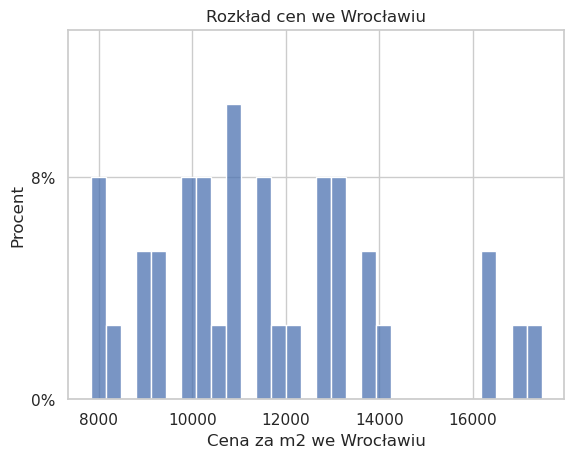

In [59]:
sns.set_palette('pastel')
# Assuming data_raw is your DataFrame
sns.set(style="whitegrid")  # Optional: Set the style for the plot

# Create the histogram
ax = sns.histplot(data=data_raw, x='zametr', bins=30, kde=False)

# Customize labels and title
plt.xlabel('Cena za m2 we Wrocławiu')
plt.ylabel('Procent')
plt.title('Rozkład cen we Wrocławiu')

# Show percentages on the y-axis
total_count = len(data_raw['zametr'])
plt.yticks([i for i in range(0, total_count + 1, total_count // 10)],
           [f'{i / total_count * 100:.0f}%' for i in range(0, total_count + 1, total_count // 10)])

# Adjust y-axis limit to the highest box
max_height = max(rect.get_height() for rect in ax.patches) + 1
plt.ylim(0, max_height)

# Show the plot
plt.show()

<Axes: xlabel='powierzchnia', ylabel='Count'>

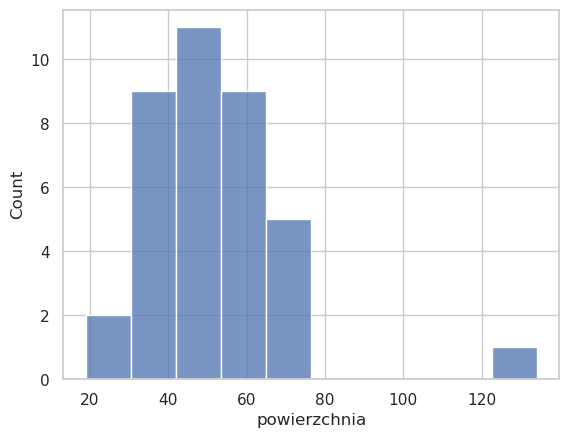

In [60]:
sns.histplot(data_raw['powierzchnia'])

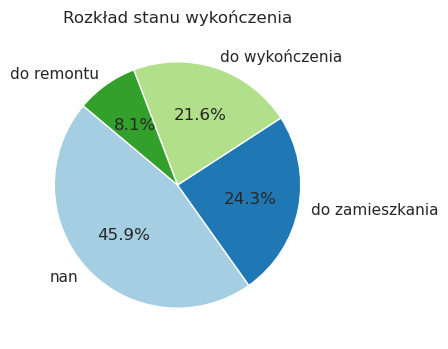

In [61]:

stan_wykonczenia_counts = data_raw['stan wykonczenia'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład stanu wykończenia')
plt.show()



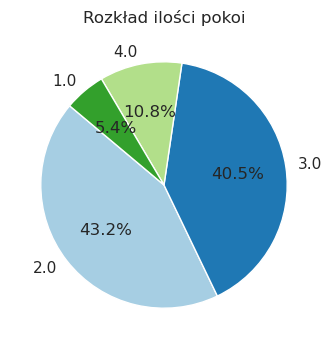

In [62]:
stan_wykonczenia_counts = data_raw['pokoje'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład ilości pokoi')
plt.show()


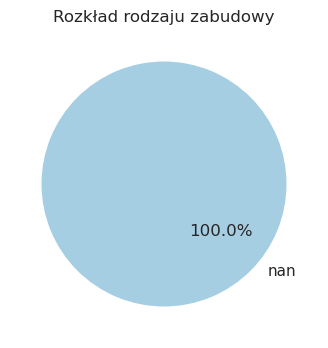

In [63]:
stan_wykonczenia_counts = data_raw['rodzaj zabudowy'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład rodzaju zabudowy')
plt.show()


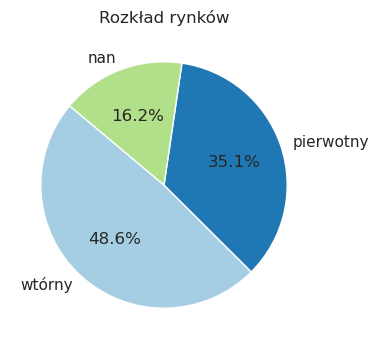

In [64]:
stan_wykonczenia_counts = data_raw['rynek'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład rynków')
plt.show()


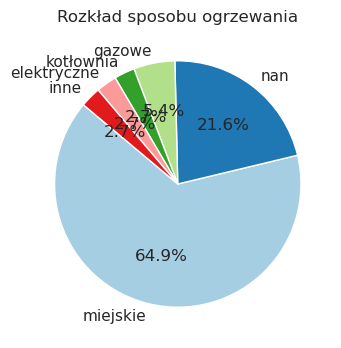

In [65]:
stan_wykonczenia_counts = data_raw['ogrzewanie'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład sposobu ogrzewania')
plt.show()


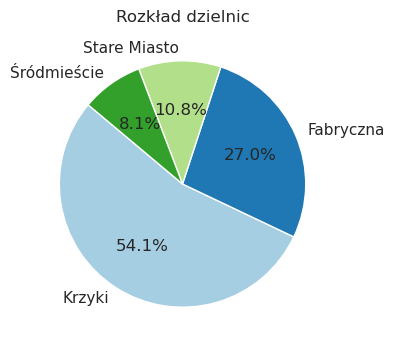

In [66]:
stan_wykonczenia_counts = data_raw['dzielnica'].value_counts(dropna = False)

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(stan_wykonczenia_counts, labels=stan_wykonczenia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Rozkład dzielnic')
plt.show()
